<h2 style="text-align: center;"><b>Практическое задание: Архитектуры и Transfer Learning</b></h3>

В данном ноутбуке мы поближе познакомимся с архитектурами *AlexNet*, *VGG* и *Inception (GoogleNet)*, и для каждой из этих моделей используем технику **Transfer Learning**.  

\> **В конце ноутбука Вам предстоит выполнить задание. Суммарно за него можно получить 10 баллов.** <

**Transfer Learning** - это процесс дообучения уже обученной нейросети на **новых данных**. Например, часто берут обученную на датасете [ImageNet](http://www.image-net.org/) нейронную сеть и дообучают ее на своих данных.

<img src="https://miro.medium.com/max/5252/1*Z11P-CjNYWBofEbmGQrptA.png" width=650>

<h2 style="text-align: center;"><b>Архитектуры</b></h3>

Во второй половине ноутбука мы будем дообучать AlexNet, VGG и GoogleNet (Inception) на новых данных. Но сначала вспомним, что эти нейросети из себя представляют (**повторение видеоурока**):

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура:

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png" width=700>

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это **самая базовая** архитектура для сверточной сети.

<h2 style="text-align: center;"><b>VGG</b></h3>

Эта сеть возникла из следующей идеи: один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область (receiptive field)** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать. 

<img src="https://cdn-images-1.medium.com/max/1600/1*YpXrr8bN5XyqOlztKPHvDw@2x.png" width=400>

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версия VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png" width=650>


<h2 style="text-align: center;"><b>GoogleNet (Inception v1)</b></h3>

#### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинках ниже: 

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg" width=700>

Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и, наоборот, для маленьких объектов лучше **маленькие** фильтры. 

Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. 


<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png" width=600>

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой -- затуханием градиентов. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.


<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки. Есть два пути:
1. Обучить сеть с нуля (как мы, например, делали в предыдущем Задании по MNIST);
2. Взять предобученную нейросеть и дообучить ее на своих данных (Transfer Learning)

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Ключевая роль этой техники -- эффективное обучение нейросетей в случае, когда мало данных. Если взять нейросеть и обучить ее **с нуля на новых данных**, притом, что их мало (менее 1000 картинок), то она почти наверное **переобучится** и будет плохо работать на тестовых данных.

Если же брать предобученную нейросеть и **дообучить ее на новых данных** -- можно избежать переобучения. Это и есть суть **Transfer Learning**.

Вспомним общую архитектуру CNN:

<img src="https://camo.githubusercontent.com/269e3903f62eb2c4d13ac4c9ab979510010f8968/68747470733a2f2f7261772e6769746875622e636f6d2f746176677265656e2f6c616e647573655f636c617373696669636174696f6e2f6d61737465722f66696c652f636e6e2e706e673f7261773d74727565" width=800>

Все выше описанные архитектуры подходят под эту схему (Inception чуть сложнее, но в конце все равно стоит классификатор в виде FC-слоев).  

Напомним, что **параметрами нейросети являюстя веса нейронов в слоях**. В полносвязных слоях это обычные нейроны (из предыдущего блока курса), в сверточных слоях это сверточные нейроны (которые осуществляют операцию свертки).

Именно эти веса и меняются при обучении нейросети. Под **заморозкой** слоя подразумевается отключение обновления весов этого слоя при обучении нейросети. То есть во время алгоритма backpropagation веса замороженных слоев не обновляются, а лишь участвуют в вычислениях как константы.



Transfer Learning можно делать двумя способами:

1. **Feature Extractor** способ:
    * Берём **уже обученную** нейросеть
    * **Убираем последние полносвязные слои** сети, отвечающие за классификацию
    * Ставим вместо них **свои слои классификации** (например, 2 полносвязных слоя), веса этих слоев **будут меняться во время обучения**
    * Веса всех свёрточных слоёв **заморожены**, то есть во время обучения сети они **меняться не будут**
    * **Обучаем** всю сеть (меняются только слои классификации) на новом датасете 
    * Используем полученную модель для предсказания
2. **Fine Tuning** способ:  
    * Берём **уже обученную** нейросеть
    * **Убираем последние полносвязные слои** сети, отвечающие за классификацию
    * Ставим вместо них **свои слои классификации** (например, 2 полносвязных слоя), веса этих слоев **будут меняться во время обучения**
    * Веса всех свёрточных слоёв **разморожены**, то есть во время обучения сети они **будут меняться**
    * **Обучаем** всю сеть (меняются веса всех слоев) на новом датасете 
    * Используем полученную модель для предсказания

Также при Fine Tuning можно размораживать не все сверточные слои, а лишь некоторые из них. Частая практика размораживать какое-то небольшое количество слоев "с конца" нейросети, которые ближе к слоям классификации, а первые 10-20 слоев оставлять замороженными.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

<p style="text-align: center;"><i>(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)</i></p>

Практическую часть ноутбука крайне рекомендуется выпонять в сервисе [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true). В нем **обязательно** нужно поставить `Runtime -> Change Runtime Type -> GPU`:

<img src="https://i.ibb.co/HhWKBKj/2020-03-11-0-14-59.png">

<img src="https://i.ibb.co/y5CftFB/2020-03-11-0-15-46.png">

In [1]:
#!pip install torch torchvision

In [2]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os

plt.ion()

Попробуем 3 типа архитектур свёрточных нейросетей -- **AlexNet, VGG16, Inception_v3** -- как *Feature Extractor* и с помощью *Fine Tuning*.

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (поклассовый accuracy)

### Данные  

В задании используются сети из библиотеки **torchvision**, предобученные на датасете ImageNet.  
В качестве новых данных будет датасет **Муравьи vs Пчёлы**: всего 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [3]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip

--2020-07-20 18:52:28--  https://download.pytorch.org/tutorial/hymenoptera_data.zip
Resolving download.pytorch.org (download.pytorch.org)... 13.35.153.7, 13.35.153.102, 13.35.153.124, ...
Connecting to download.pytorch.org (download.pytorch.org)|13.35.153.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47286322 (45M) [application/zip]
Saving to: ‘hymenoptera_data.zip.1’

hymenoptera_data.zi 100%[===================>]  45.10M   252MB/s    in 0.2s    

2020-07-20 18:52:28 (252 MB/s) - ‘hymenoptera_data.zip.1’ saved [47286322/47286322]



In [4]:
!unzip ./hymenoptera_data.zip

Archive:  ./hymenoptera_data.zip
replace hymenoptera_data/train/ants/0013035.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: hymenoptera_data/train/ants/0013035.jpg  
  inflating: hymenoptera_data/train/ants/1030023514_aad5c608f9.jpg  
  inflating: hymenoptera_data/train/ants/1095476100_3906d8afde.jpg  
  inflating: hymenoptera_data/train/ants/1099452230_d1949d3250.jpg  
  inflating: hymenoptera_data/train/ants/116570827_e9c126745d.jpg  
  inflating: hymenoptera_data/train/ants/1225872729_6f0856588f.jpg  
  inflating: hymenoptera_data/train/ants/1262877379_64fcada201.jpg  
  inflating: hymenoptera_data/train/ants/1269756697_0bce92cdab.jpg  
  inflating: hymenoptera_data/train/ants/1286984635_5119e80de1.jpg  
  inflating: hymenoptera_data/train/ants/132478121_2a430adea2.jpg  
  inflating: hymenoptera_data/train/ants/1360291657_dc248c5eea.jpg  
  inflating: hymenoptera_data/train/ants/1368913450_e146e2fb6d.jpg  
  inflating: hymenoptera_data/train/ants/1473187633_63ccaacea6.jpg

In [5]:
# Преобразование обучающих данных для подачи в нейросеть
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# Gапка с данными
data_dir = './hymenoptera_data'
image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms[x])
    for x in ['train', 'val']
}
# Cпециальный класс для загрузки данных в виде батчей
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], 
        batch_size=4,
        shuffle=True, 
        num_workers=4
    )
    for x in ['train', 'val']
}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()

Размеры обучающей и валидационной выборок:

In [6]:
print(dataset_sizes)

{'train': 244, 'val': 153}


В каждом батче будет по 4 картинки, и мы поставили `shuffle = True`, чтобы генератор выдавал случайные батчи из обучающей выборки.

Посмотрим на картинки из датасета:

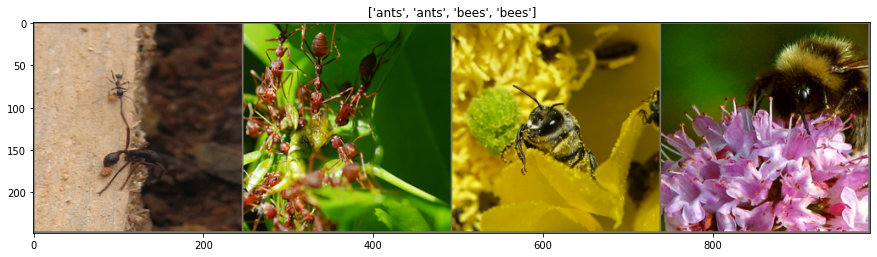

In [7]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(dataloaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [8]:
for i in dataloaders['train']:
    print(i[0][0])
    break

tensor([[[ 1.8208,  1.8379,  1.9064,  ...,  1.4612,  1.4440,  1.4440],
         [ 1.7523,  1.7694,  1.8208,  ...,  1.5982,  1.5982,  1.5982],
         [ 1.6495,  1.6667,  1.6838,  ...,  1.8037,  1.8208,  1.8379],
         ...,
         [ 1.0844,  0.8618,  0.3652,  ...,  1.6153,  1.5639,  1.5468],
         [ 1.1700,  0.9817,  0.5707,  ...,  1.4440,  1.3755,  1.3413],
         [ 1.2214,  1.0673,  0.6906,  ...,  1.3413,  1.2557,  1.2214]],

        [[ 1.6583,  1.6933,  1.7808,  ...,  1.6933,  1.7108,  1.7108],
         [ 1.6408,  1.6583,  1.7108,  ...,  1.8158,  1.8333,  1.8508],
         [ 1.5882,  1.5882,  1.6057,  ...,  2.0084,  2.0434,  2.0609],
         ...,
         [ 0.5203,  0.2752, -0.3200,  ...,  1.6232,  1.6232,  1.6057],
         [ 0.6078,  0.3627, -0.2325,  ...,  1.5182,  1.4482,  1.4132],
         [ 0.6604,  0.4153, -0.1625,  ...,  1.4482,  1.3431,  1.2906]],

        [[ 1.6291,  1.7163,  1.9428,  ...,  1.3851,  1.3502,  1.3328],
         [ 1.4374,  1.5071,  1.6814,  ...,  1

Видим, что после обработки данные в батчах нормализованы (то есть они не от 0 до 255, как это изначально в изображениях).

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ алгоритм изменения learning_rate
* num_epochs $-$ количество итераций обучения

In [9]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    
    losses = {'train': [], 'val': []}

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train(True)  # установаить модель в режим обучения
            else:
                model.train(False)  # установить модель в режим предсказания

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in dataloaders[phase]:
                # получаем картинки и метки
                inputs, labels = data

                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels

                # инициализируем градиенты параметров
                optimizer.zero_grad()

                # forward pass
                outputs = model(inputs)
                _, preds = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)

                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            losses[phase].append(epoch_loss)
            
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses

Функция для отрисовки тестовых изображений и предсказаний для них:

In [10]:
def visualize_model(model, num_images=6):
    images_so_far = 0
    fig = plt.figure()

    for i, data in enumerate(dataloaders['val']):
        inputs, labels = data
        if use_gpu:
            inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), Variable(labels)

        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)

        for j in range(inputs.size()[0]):
            images_so_far += 1
            ax = plt.subplot(num_images // 2, 2, images_so_far)
            ax.axis('off')
            ax.set_title('predicted: {}'.format(class_names[preds[j]]))
            imshow(inputs.cpu().data[j])

            if images_so_far == num_images:
                return

Функция для измерения точности модели на валидационном датасете

In [11]:
def evaluate(model):
    model.train(False)
    
    runninig_correct = 0
    for data in dataloaders['val']:
        # получаем картинки и метки
        inputs, labels = data
        
        # переносим на GPU, если возможно
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
            
        # forward pass
        output = model(inputs)
        _, predicted = torch.max(output, 1)
        
        runninig_correct += int(torch.sum(predicted == labels))
        
    return runninig_correct / dataset_sizes['val']

Для каждой из следующих нейросетей:
* **AlexNet**
* **VGG16**
* **GoogleNet (Inception)**

Напишем код и выведем результат (график лосса, accuracy и вывод примера классификации картинок с визуализацией) для двух способов: **Feature Extractor** и **Fine Tuning** нейросети.

### AlexNet

Загрузка модели:

In [12]:
model = models.alexnet(pretrained=True)

Посмотрим, что внутри:

In [13]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Убедимся, что по-умолчанию все слои "разморожены", то есть будут обучаться:

In [14]:
for i, param in enumerate(model.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True
Parameter 12: True
Parameter 13: True
Parameter 14: True
Parameter 15: True


(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [15]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [16]:
model, losses = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.3285 Acc: 0.5533
val Loss: 0.1751 Acc: 0.4771

Epoch 1/24
----------
train Loss: 0.1720 Acc: 0.4959
val Loss: 0.1784 Acc: 0.5098

Epoch 2/24
----------
train Loss: 0.1726 Acc: 0.5533
val Loss: 0.1777 Acc: 0.5229

Epoch 3/24
----------
train Loss: 0.1697 Acc: 0.5615
val Loss: 0.1759 Acc: 0.5033

Epoch 4/24
----------
train Loss: 0.1691 Acc: 0.5164
val Loss: 0.1769 Acc: 0.4967

Epoch 5/24
----------
train Loss: 0.1737 Acc: 0.5861
val Loss: 0.1774 Acc: 0.4837

Epoch 6/24
----------
train Loss: 0.1690 Acc: 0.5287
val Loss: 0.1777 Acc: 0.4837

Epoch 7/24
----------
train Loss: 0.1704 Acc: 0.5328
val Loss: 0.1775 Acc: 0.4771

Epoch 8/24
----------
train Loss: 0.1706 Acc: 0.5287
val Loss: 0.1774 Acc: 0.4837

Epoch 9/24
----------
train Loss: 0.1680 Acc: 0.5574
val Loss: 0.1772 Acc: 0.4902

Epoch 10/24
----------
train Loss: 0.1686 Acc: 0.5533
val Loss: 0.1763 Acc: 0.4967

Epoch 11/24
----------
train Loss: 0.1681 Acc: 0.5615
val Loss: 0.1760 Acc: 0.4967

Epoch 12/24
----------
t

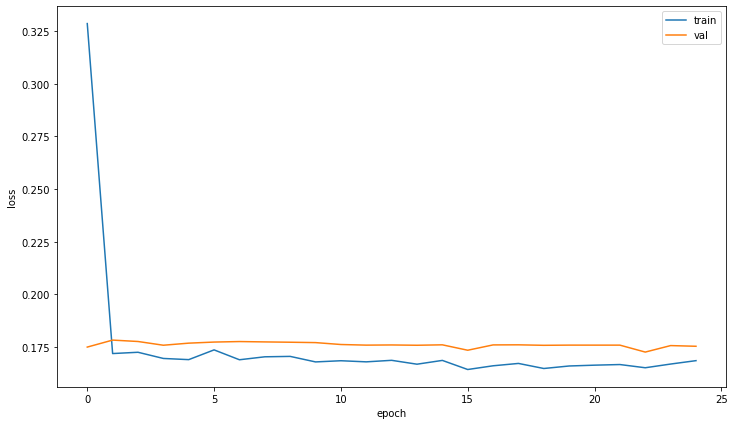

In [17]:
# Построим график лосса при обучении и валидации
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

#### Сохраним веса модели -- в PyTorch это делается так:

In [18]:
torch.save(model.state_dict(), 'AlexNet_fine_tune.pth')

#### Загрузим веса модели:

In [19]:
model.load_state_dict(torch.load('AlexNet_fine_tune.pth'))

<All keys matched successfully>

#### Оценим модель на тесте (валидации):

In [20]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

Accuracy: 0.5033


Видим, что Fine Tuning AlexNet'а не дал хороших результатов, поскольку качество получается низким. Посмотрим, как будет с AlexNet в роли Feature Extractor'а.

* **Feature Extractor** способ:

In [21]:
model_extractor = models.alexnet(pretrained=True)

Помним, что по-умолчанию все слои нейросети обучаются заново:

In [22]:
for i, param in enumerate(model_extractor.parameters()):
    print(f'Parameter {i}: {param.requires_grad}')

Parameter 0: True
Parameter 1: True
Parameter 2: True
Parameter 3: True
Parameter 4: True
Parameter 5: True
Parameter 6: True
Parameter 7: True
Parameter 8: True
Parameter 9: True
Parameter 10: True
Parameter 11: True
Parameter 12: True
Parameter 13: True
Parameter 14: True
Parameter 15: True


Сделаем так, чтобы на них не распространялся backpropagation (то есть **заморозим их**), и подменим классификатор (ведь старый все еще с весами для ImageNet'а):

In [23]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.classifier.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [24]:
%%time
model_extractor,losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 1.2009 Acc: 0.7131
val Loss: 1.3694 Acc: 0.8301

Epoch 1/24
----------
train Loss: 1.1248 Acc: 0.7951
val Loss: 0.9376 Acc: 0.8497

Epoch 2/24
----------
train Loss: 0.7392 Acc: 0.8607
val Loss: 1.1854 Acc: 0.8824

Epoch 3/24
----------
train Loss: 0.9095 Acc: 0.8238
val Loss: 1.0841 Acc: 0.9020

Epoch 4/24
----------
train Loss: 0.7094 Acc: 0.8607
val Loss: 1.4092 Acc: 0.8824

Epoch 5/24
----------
train Loss: 1.0273 Acc: 0.8566
val Loss: 1.1805 Acc: 0.9020

Epoch 6/24
----------
train Loss: 0.5151 Acc: 0.8934
val Loss: 0.9929 Acc: 0.9085

Epoch 7/24
----------
train Loss: 0.2816 Acc: 0.9344
val Loss: 0.9432 Acc: 0.9150

Epoch 8/24
----------
train Loss: 0.2372 Acc: 0.9467
val Loss: 0.9244 Acc: 0.9150

Epoch 9/24
----------
train Loss: 0.5503 Acc: 0.9139
val Loss: 0.9370 Acc: 0.9085

Epoch 10/24
----------
train Loss: 0.5089 Acc: 0.9016
val Loss: 0.9323 Acc: 0.9085

Epoch 11/24
----------
train Loss: 0.3787 Acc: 0.9180
val Loss: 0.9359 Acc: 0.9020

Epoch 12/24
----------
t

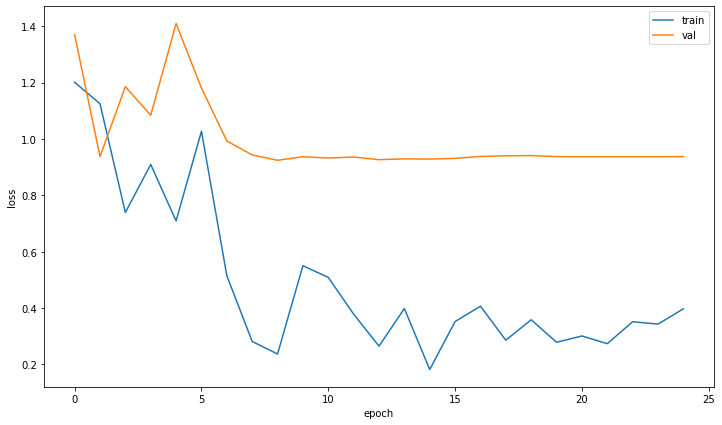

In [25]:
# Построим график лосса при обучении и валидации
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [26]:
torch.save(model_extractor.state_dict(), 'AlexNet_extractor.pth')

In [27]:
model_extractor.load_state_dict(torch.load('AlexNet_extractor.pth'))

<All keys matched successfully>

In [28]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.9085


Видим, что качество намного лучше: ~90%.

* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

In [29]:
model_mixed = models.alexnet(pretrained=True)

In [30]:
layers_to_unfreeze = 5

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False
    
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 9216
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_mixed = model_mixed.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой 
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = optim.SGD(list(model_mixed.features.parameters())[-layers_to_unfreeze:] + 
                      list(model_mixed.classifier.parameters()), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [31]:
%%time
_, losses = train_model(model_mixed, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.3526 Acc: 0.7541
val Loss: 0.1859 Acc: 0.8105

Epoch 1/24
----------
train Loss: 0.1366 Acc: 0.7705
val Loss: 0.1050 Acc: 0.8235

Epoch 2/24
----------
train Loss: 0.0977 Acc: 0.8197
val Loss: 0.1771 Acc: 0.8170

Epoch 3/24
----------
train Loss: 0.1567 Acc: 0.8156
val Loss: 0.1283 Acc: 0.7516

Epoch 4/24
----------
train Loss: 0.0854 Acc: 0.8648
val Loss: 0.1421 Acc: 0.8627

Epoch 5/24
----------
train Loss: 0.0878 Acc: 0.8443
val Loss: 0.1384 Acc: 0.8235

Epoch 6/24
----------
train Loss: 0.0823 Acc: 0.8607
val Loss: 0.1369 Acc: 0.8366

Epoch 7/24
----------
train Loss: 0.0637 Acc: 0.8689
val Loss: 0.1069 Acc: 0.8562

Epoch 8/24
----------
train Loss: 0.0564 Acc: 0.9180
val Loss: 0.1042 Acc: 0.8627

Epoch 9/24
----------
train Loss: 0.0576 Acc: 0.9139
val Loss: 0.1026 Acc: 0.8693

Epoch 10/24
----------
train Loss: 0.0449 Acc: 0.9221
val Loss: 0.1012 Acc: 0.8824

Epoch 11/24
----------
train Loss: 0.0494 Acc: 0.9221
val Loss: 0.1026 Acc: 0.8824

Epoch 12/24
----------
t

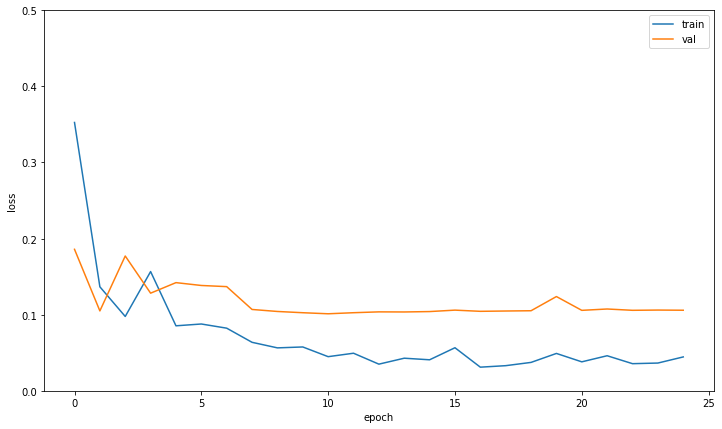

In [32]:
# Построим график лосса при обучении и валидации
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [33]:
torch.save(model_mixed.state_dict(), 'AlexNet_mixed.pth')

In [34]:
model_mixed.load_state_dict(torch.load('AlexNet_mixed.pth'))

<All keys matched successfully>

In [35]:
print("Accuracy: {0:.4f}".format(evaluate(model_mixed)))

Accuracy: 0.8954


Как видим, результат чуть-чуть ухудшился. Как Вы думаете, почему полный или частичный Fine Tuning в данном случае ухудшает качество работы нейросети?

---

### Более современные нейросети (10 баллов)

Теперь Вам предлагается **самостоятельно** сделать Fine Tuning и Transfer Learning для моделей VGG и Inception.

**Суммарно можно получить 10 баллов**.

### VGG16 (2 + 2 = 4 балла)

Здесь все будет аналогично AlexNet, только большее количество слоев:

In [36]:
model = models.vgg16(pretrained=True)

In [37]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

* **Fine Tuning** способ (2 балла):

In [38]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 25088
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [39]:
# Запустим обучение
model, losses = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.2094 Acc: 0.5738
val Loss: 0.1628 Acc: 0.6275

Epoch 1/24
----------
train Loss: 0.1666 Acc: 0.6107
val Loss: 0.1505 Acc: 0.7190

Epoch 2/24
----------
train Loss: 0.1468 Acc: 0.7049
val Loss: 0.1092 Acc: 0.8301

Epoch 3/24
----------
train Loss: 0.1663 Acc: 0.6557
val Loss: 0.1247 Acc: 0.7582

Epoch 4/24
----------
train Loss: 0.1344 Acc: 0.7500
val Loss: 0.1253 Acc: 0.7974

Epoch 5/24
----------
train Loss: 0.1288 Acc: 0.7705
val Loss: 0.1063 Acc: 0.8366

Epoch 6/24
----------
train Loss: 0.1056 Acc: 0.8033
val Loss: 0.0856 Acc: 0.8627

Epoch 7/24
----------
train Loss: 0.0699 Acc: 0.8811
val Loss: 0.0802 Acc: 0.8824

Epoch 8/24
----------
train Loss: 0.0671 Acc: 0.8893
val Loss: 0.0807 Acc: 0.8758

Epoch 9/24
----------
train Loss: 0.0542 Acc: 0.9016
val Loss: 0.0787 Acc: 0.9150

Epoch 10/24
----------
train Loss: 0.0554 Acc: 0.9098
val Loss: 0.0820 Acc: 0.8824

Epoch 11/24
----------
train Loss: 0.0602 Acc: 0.8852
val Loss: 0.0739 Acc: 0.9150

Epoch 12/24
----------
t

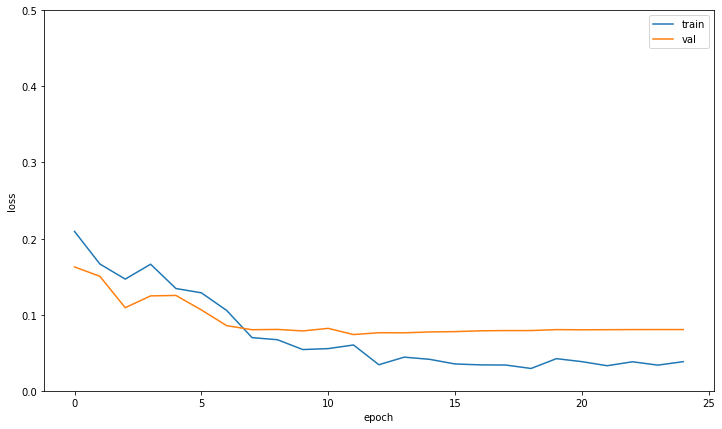

In [40]:
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [41]:
torch.save(model.state_dict(), 'VGG16.pth')

In [42]:
model.load_state_dict(torch.load('VGG16.pth'))

<All keys matched successfully>

In [43]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

Accuracy: 0.9216


* **Feature Extractor** способ (2 балла):

In [44]:
model_extractor = models.vgg16(pretrained=True)

In [45]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 25088
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.classifier.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [46]:
%%time
model_extractor,losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.3617 Acc: 0.8484
val Loss: 0.7111 Acc: 0.8627

Epoch 1/24
----------
train Loss: 0.3765 Acc: 0.8934
val Loss: 0.4674 Acc: 0.9412

Epoch 2/24
----------
train Loss: 0.4972 Acc: 0.8648
val Loss: 0.6097 Acc: 0.9085

Epoch 3/24
----------
train Loss: 0.5040 Acc: 0.8934
val Loss: 0.3589 Acc: 0.9150

Epoch 4/24
----------
train Loss: 0.3068 Acc: 0.9180
val Loss: 0.4526 Acc: 0.9150

Epoch 5/24
----------
train Loss: 0.2538 Acc: 0.9426
val Loss: 0.5767 Acc: 0.9216

Epoch 6/24
----------
train Loss: 0.2219 Acc: 0.9426
val Loss: 0.5043 Acc: 0.9281

Epoch 7/24
----------
train Loss: 0.2253 Acc: 0.9180
val Loss: 0.5106 Acc: 0.9281

Epoch 8/24
----------
train Loss: 0.1952 Acc: 0.9508
val Loss: 0.4849 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.1024 Acc: 0.9631
val Loss: 0.4473 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.1150 Acc: 0.9672
val Loss: 0.4188 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.2731 Acc: 0.9139
val Loss: 0.4118 Acc: 0.9477

Epoch 12/24
----------
t

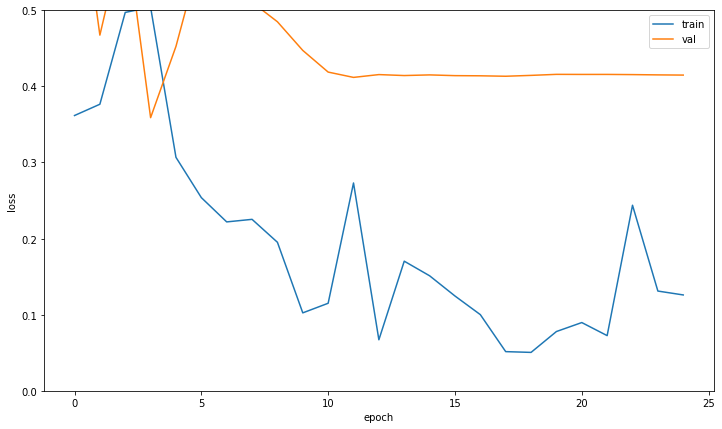

In [47]:
# Построим график лосса при обучении и валидации
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [48]:
torch.save(model_extractor.state_dict(), 'VGG16.pth')

In [49]:
model_extractor.load_state_dict(torch.load('VGG16.pth'))

<All keys matched successfully>

In [50]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.9477


Какой подход оказался лучше с VGG? Сильная ли между ними разница в качестве? Как Вы думаете, почему?

**Вывод по VGG:**
Использоавние Fine Tuning показало чуть худший результат по точности (Accuracy = 0.9216 ), чем использование Feature Extractor (Accuracy = 0.9477). Но разница несущественная. Возможно размера Датасета оказывается  недостаточно, чтобы полностью переобучить все сеть. 

### GoogleNet (Inception) (2 + 2 = 4 балла)

С этой нейросетью нужно сделать то же самое. Код снова можно переиспользовать от AlexNet/VGG, однако стоит учесть, что **слой классификации в Inception называется не `classificator`, а `fc`.**

In [51]:
# Нужно поменять размер картинок на 299, иначе будет ошибка, так как размерность станет отрицательной.
# Это вызвано тем, что нейросеть изначально обучалась на картинках размера 299.

# Результирующий размер картинок определяется трансформациями
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Сам объект датасета
image_datasets = {
    x: datasets.ImageFolder(
        os.path.join(data_dir, x),
        data_transforms[x])
    for x in ['train', 'val']
}

# специальный класс для загрузки данных в виде батчей
dataloaders = {
    x: torch.utils.data.DataLoader(
        image_datasets[x], 
        batch_size=4,
        shuffle=True, 
        num_workers=4
    )
    for x in ['train', 'val']
}

In [52]:
model = models.googlenet(pretrained=True)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/checkpoints/googlenet-1378be20.pth


In [53]:
model

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

* **Fine Tuning** способ (2 балла):

In [54]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 1024
# Заменяем Fully-Connected слой на наш линейный классификатор
model.fc = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model = model.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# В качестве оптимизатора - стохастический градиентный спуск
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [55]:
%%time
model.aux_logits = False
model,losses = train_model(model, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.1445 Acc: 0.7008
val Loss: 0.0833 Acc: 0.9216

Epoch 1/24
----------
train Loss: 0.1060 Acc: 0.7951
val Loss: 0.0622 Acc: 0.9216

Epoch 2/24
----------
train Loss: 0.1032 Acc: 0.8074
val Loss: 0.0456 Acc: 0.9412

Epoch 3/24
----------
train Loss: 0.1049 Acc: 0.7910
val Loss: 0.0460 Acc: 0.9412

Epoch 4/24
----------
train Loss: 0.0711 Acc: 0.8689
val Loss: 0.0384 Acc: 0.9477

Epoch 5/24
----------
train Loss: 0.1003 Acc: 0.8484
val Loss: 0.0433 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.0927 Acc: 0.8525
val Loss: 0.0395 Acc: 0.9542

Epoch 7/24
----------
train Loss: 0.0748 Acc: 0.8689
val Loss: 0.0428 Acc: 0.9346

Epoch 8/24
----------
train Loss: 0.0775 Acc: 0.8770
val Loss: 0.0515 Acc: 0.9281

Epoch 9/24
----------
train Loss: 0.0838 Acc: 0.8566
val Loss: 0.0373 Acc: 0.9542

Epoch 10/24
----------
train Loss: 0.0656 Acc: 0.8934
val Loss: 0.0400 Acc: 0.9346

Epoch 11/24
----------
train Loss: 0.0755 Acc: 0.8852
val Loss: 0.0385 Acc: 0.9412

Epoch 12/24
----------
t

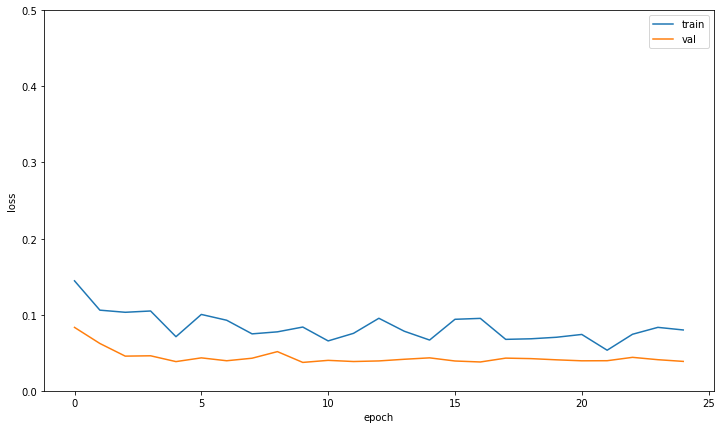

In [56]:
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [57]:
torch.save(model.state_dict(), 'GoogleNet.pth')

In [58]:
model.load_state_dict(torch.load('GoogleNet.pth'))

<All keys matched successfully>

In [59]:
print("Accuracy: {0:.4f}".format(evaluate(model)))

Accuracy: 0.9477


* **Feature Extractor** способ (2 балла):

In [60]:
model_extractor = models.googlenet(pretrained=True)

In [61]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 1024
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.fc = nn.Linear(num_features, 2)

# Использовать ли GPU
if use_gpu:
    model_extractor = model_extractor.cuda()

# В качестве cost function используем кросс-энтропию
loss_fn = nn.CrossEntropyLoss()

# Обучаем только классификатор
optimizer = optim.SGD(model_extractor.fc.parameters(), lr=0.001, momentum=0.9)

# Умножает learning_rate на 0.1 каждые 7 эпох (это одна из эвристик, не было на лекциях)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [62]:
%%time
model_extractor.aux_logits = False
model_extractor,losses = train_model(model_extractor, loss_fn, optimizer, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train Loss: 0.1595 Acc: 0.6148
val Loss: 0.1804 Acc: 0.4706

Epoch 1/24
----------
train Loss: 0.1237 Acc: 0.7910
val Loss: 0.1029 Acc: 0.8235

Epoch 2/24
----------
train Loss: 0.1133 Acc: 0.7910
val Loss: 0.0852 Acc: 0.8627

Epoch 3/24
----------
train Loss: 0.1232 Acc: 0.7664
val Loss: 0.0614 Acc: 0.9346

Epoch 4/24
----------
train Loss: 0.1180 Acc: 0.7787
val Loss: 0.0649 Acc: 0.9085

Epoch 5/24
----------
train Loss: 0.1117 Acc: 0.7992
val Loss: 0.0556 Acc: 0.9477

Epoch 6/24
----------
train Loss: 0.1009 Acc: 0.8115
val Loss: 0.0509 Acc: 0.9412

Epoch 7/24
----------
train Loss: 0.0930 Acc: 0.8648
val Loss: 0.0524 Acc: 0.9412

Epoch 8/24
----------
train Loss: 0.0959 Acc: 0.8320
val Loss: 0.0518 Acc: 0.9412

Epoch 9/24
----------
train Loss: 0.0909 Acc: 0.8484
val Loss: 0.0522 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.0840 Acc: 0.8607
val Loss: 0.0523 Acc: 0.9477

Epoch 11/24
----------
train Loss: 0.0797 Acc: 0.8852
val Loss: 0.0512 Acc: 0.9412

Epoch 12/24
----------
t

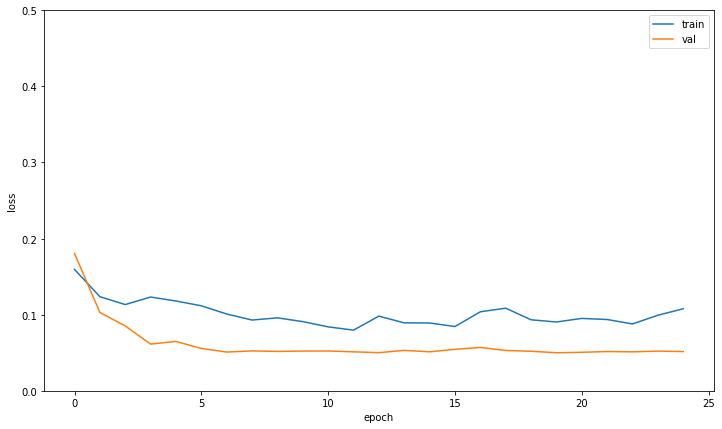

In [63]:
figure = plt.figure(figsize=(12, 7))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.ylim([0, 0.5])
plt.plot(losses['train'], label='train')
plt.plot(losses['val'], label='val')
plt.legend();

In [ ]:
torch.save(model_extractor.state_dict(), 'GoogleNet_ex.pth')

In [65]:
model_extractor.load_state_dict(torch.load('GoogleNet_ex.pth'))

<All keys matched successfully>

In [66]:
print("Accuracy: {0:.4f}".format(evaluate(model_extractor)))

Accuracy: 0.9412


---

### Выводы (1 + 1 = 2 балла)

(1 балл) Какой подход оказался лучше с GoogleNet: Fine tuning или Feature Extractor? Сильная ли между этими подходами получилась разница в качестве? Как Вы думаете, почему?

**Ответ:** **Вывод по GoogleNet:**
Использоавние Fine Tuning показало чуть лучший результат (Accuracy = 0.9477 ), чем использование Feature Extractor (Accuracy = 0.9412). Но разница несущественная, на уровне погрешности. 
Возможно это связано с архитектурой сети, а именно с использование двух вспомогательных классификаторов, кроме основного. Это ускоряет процесс дообучения при подходе Fine tuning. 

(1 балла) Какая модель показала себя лучше всех по метрике качества? С чем это может быть связано?

**Ответ:**

Лучше всего себя показала дообученная с испльзованием подхода Fine Tuning модель сети Google Net (ну как лучше, на 0.006,  по мне так разницы особой не заметно). Это может быть связано как с особенностью архитектуры исходной сети, позволяющей "улавливать" как большие, так и небольшие элементы изображения за счет Incepton, а также со стабильностью обучения (минимизации los) на новом датасете за счет вспомогательного классификатора, что позволило эффективно дообучить сеть.



---

Можно убедиться, что все модели, которые мы использовали, успешно сохранены на диск и готовы к перемещению/переиспользованию:

In [67]:
!ls

AlexNet_extractor.pth  GoogleNet.pth	     hymenoptera_data.zip.1
AlexNet_fine_tune.pth  hymenoptera_data      sample_data
AlexNet_mixed.pth      hymenoptera_data.zip  VGG16.pth


Поздравляем!  
Теперь вы можете решать любые задачи классификации изображений самостоятельно с помощью техники Transfer Learning.


<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Курс Стэнфордского университета по нейронным сетям: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про Transfer Learning в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  